# Classification of IMDB movie reviews (Binary)

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

# num_words=10000 is used just to use the top 10000 frequently occurring words

Using TensorFlow backend.


17465344/17464789 [==============================] - 42s 2us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index= imdb.get_word_index()
reverse_word_index= dict([(value, key) for (key, value) in word_index.items()])

1646592/1641221 [==============================] - 2s 1us/step


In [13]:
type(word_index)

dict

In [17]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [50]:
list(word_index)[0:10]

['fawn',
 'tsukino',
 'nunnery',
 'sonja',
 'vani',
 'woods',
 'spiders',
 'hanging',
 'woody',
 'trawling']

In [54]:
decoded_review= ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [58]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

We can follow two ways:
 - Pad the lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in the network a layer capable of handling such integer tensors 
 - One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then use as the first layer

#### Encoding the integer sequences into a binary matrix

 - Create an all-zero matrix of ```shape(len(sequences), dimension)```
 - Sets specific indices of ```results[i]``` to **1**s
 - Vectorized training data
 - Vectorized test data

In [89]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

In [90]:
x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

In [118]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [119]:
x_train[1][9999]

0.0

In [126]:
#Vectorize the labels

y_train= train_labels.astype('float32')
y_test= test_labels.astype('float32')

### Building the Network

The input data is vectors, and the labels are scalars (1s and 0s)

The type of network that performs well on such a problem is a simple stack of fully connected (Dense) layers with relu activations: 

```Dense(16, activation='relu')```

The argument being passed to each Dense layer (16) is the number of hidden
units of the layer. A ***hidden unit*** is a dimension in the representation space of the layer.

Each Dense layer with a relu activation implements the following chain of tensor operations:

```output = relu(dot(W, input) + b)```

Having 16 hidden units means the weight matrix ```W``` will have shape ```(input_dimension, 16)```: the dot product with ```W``` will project the input data onto a *16-dimensional* representation space (and then we’ll add the bias vector ```b``` and apply the ***relu*** operation). Having more hidden units (a higher-dimensional representation space) allows your network to learn more-complex representations, but it makes the network more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).


We will use 2 intermediate layers with 16 hidden units in each and and the third will be the output layer for scalar prediction.

The intermediate layers will use ```relu``` as their activation function, and the final layer will use a ```sigmoid``` activation so as to output a *probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be positive).*

```relu``` **(rectified linear unit)** is a function meant to zero out negative values

![capture](https://user-images.githubusercontent.com/13174586/49515480-fef7e880-f8bc-11e8-99c9-e350197be712.JPG)


```sigmoid``` “squashes” arbitrary values into the **[0, 1]** interval output that can be interpreted as a **probability**.

![capture](https://user-images.githubusercontent.com/13174586/49515587-4da58280-f8bd-11e8-8952-0e71969b0528.JPG)


#### The final Network:

![capture](https://user-images.githubusercontent.com/13174586/49516044-93af1600-f8be-11e8-915f-799147be08a9.JPG)



### Define Model

In [162]:
from keras import optimizers, layers, models

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

For ***Loss*** we will use ```binary_crossentropy``` since it is a binary classification problem and the output of the last single init is probability with ```sigmoid``` activation function.

We can also use ```mean_squared_error``` as loss function but ```crossentropy``` is the best choice when dealing with models that outputs probabilities.

> Crossentropy is a quantity from the field of Information
Theory that measures the distance between probability distributions between the ground-truth distribution and your predictions.

#### Compile the Model

In [163]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

#### Configure the Custom Optimizer, Loss and Metrics

In [153]:
from keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

#### Validate Approach

In order to monitor during training the accuracy of the model on data it has never seen before, we’ll create a validation set by setting apart 10,000 samples from the original training data.

In [164]:
x_val= x_train[:10000]
partial_x_train= x_train[10000:]

y_val= y_train[:10000]
partial_y_train= y_train[10000:]

Now train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
will monitor loss and accuracy on the 10,000 samples that are set apart. We do so by
passing the validation data as the validation_data argument.

#### Train the Network

In [165]:
history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.5224 - acc: 0.7835 - val_loss: 0.3930 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 229us/step - loss: 0.3155 - acc: 0.8976 - val_loss: 0.3162 - val_acc: 0.8807
Epoch 3/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.2298 - acc: 0.9251 - val_loss: 0.2790 - val_acc: 0.8916
Epoch 4/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.1807 - acc: 0.9397 - val_loss: 0.2894 - val_acc: 0.8820
Epoch 5/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.1428 - acc: 0.9534 - val_loss: 0.3101 - val_acc: 0.8802
Epoch 6/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.1175 - acc: 0.9632 - val_loss: 0.2920 - val_acc: 0.8858
Epoch 7/20
15000/15000 [==============================] - 3s 218us/step - loss: 0.0974 - acc: 0.9711 - val_loss: 0.3091 - 

The call to ```model.fit()``` returns a **History** object. This object has a member
```history```, which is a dictionary containing data about everything that happened
during training.

In [166]:
history_dict= history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

The dictionary contains four entries: one per metric that was being monitored during training and during validation.

Let’s use **Matplotlib** to plot the training and validation loss side by side as well as the training and
validation accurac

In [170]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values= history_dict['loss']
val_loss_values= history_dict['val_loss']
acc= history_dict['acc']
val_acc= history_dict['val_acc']

In [168]:
epochs= range(1,len(acc)+1)
print(epochs)

range(1, 21)


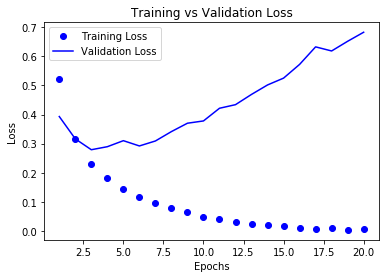

In [169]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

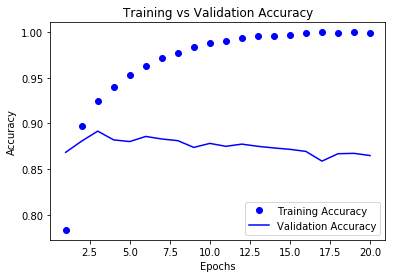

In [171]:
plt.clf() #Clears the figure
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The training loss decreases with every epoch, and the training accuracy increases with every epoch.
This is what we expect when running **gradient descent optimization**—the quantity we’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. 
A model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. It is ```overfitting```:
after the second epoch, we’re overoptimizing on the training data, and we end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

### Retraining Model from scratch

In [206]:
model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [207]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [208]:
model.fit(x_train, y_train, epochs= 4, batch_size=1024)
results= model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 5s 199us/step - loss: 0.5270 - acc: 0.7622
Epoch 2/4
25000/25000 [==============================] - 4s 144us/step - loss: 0.3251 - acc: 0.8944
Epoch 3/4
25000/25000 [==============================] - 3s 140us/step - loss: 0.2530 - acc: 0.9161
Epoch 4/4
25000/25000 [==============================] - 5s 211us/step


[0.28489990094184875, 0.8878]

***Loss:***     0.298
    
***Accuracy:*** 88.78%    

In [209]:
#Use Trained Network to generate Predictions on New Data

model.predict(x_test)

array([[0.32441708],
       [0.9994568 ],
       [0.90419775],
       ...,
       [0.2339928 ],
       [0.11365297],
       [0.5198466 ]], dtype=float32)